In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

import string
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
import sklearn.gaussian_process.kernels as kernels

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from scipy.stats import expon


In [14]:
payloads = pd.read_csv("payloads_project.csv")
payloads= payloads.dropna()
payloads= payloads.drop_duplicates()
#payloads.groupby('injection_type').size()


In [3]:
def plot_feature_distribution(features):
    print('Properties of feature: ' + features.name)
    print(features.describe())
    f, ax = plt.subplots(1, figsize=(10, 6))
    ax.hist(features, bins=features.max()-features.min()+1, density=1)
    ax.set_xlabel('value')
    ax.set_ylabel('fraction')
    
    plt.show()

Properties of feature: length
count    140725.000000
mean         21.397513
std          38.499630
min           1.000000
25%           6.000000
50%           9.000000
75%          17.000000
max         974.000000
Name: length, dtype: float64


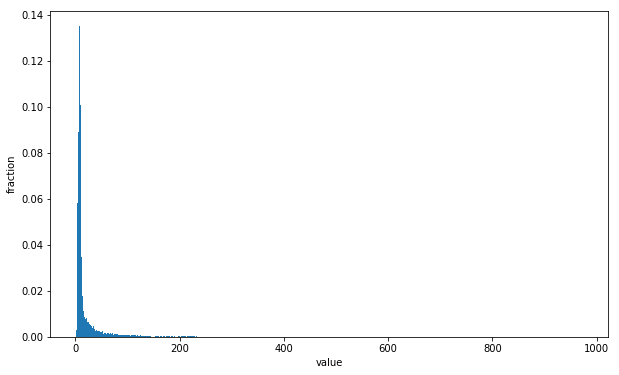

In [4]:
def create_feature_length(payloads):
    '''
        Feature describing the lengh of the input
    '''
    
    
    payloads['length'] = [len(str(row)) for row in payloads['payload']]
    return payloads


payloads = create_feature_length(payloads)


plot_feature_distribution(payloads['length'])

In [5]:
def create_feature_non_printable_characters(payloads):  
    '''
    Feature
    Number of non printable characthers within payload
    '''
    
    payloads['non-printable'] = [ len([1 for letter in str(row) if letter not in string.printable]) for row in payloads['payload']]
    return payloads
    


Properties of feature: punctuation
count    140725.000000
mean          3.455363
std          10.568040
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         538.000000
Name: punctuation, dtype: float64


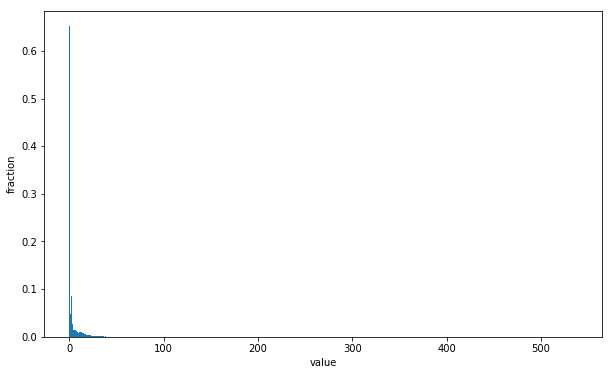

In [6]:
def create_feature_punctuation_characters(payloads):
    '''
    Feature
    Number of punctuation characthers within payload
    '''
    
    payloads['punctuation'] = [ len([1 for letter in str(row) if letter in string.punctuation]) for row in payloads['payload']]
    return payloads
    

create_feature_punctuation_characters(payloads)
    
plot_feature_distribution(payloads['punctuation'])

Properties of feature: min-byte
count    140725.000000
mean         66.390187
std          27.772748
min           9.000000
25%          37.000000
50%          65.000000
75%          97.000000
max         125.000000
Name: min-byte, dtype: float64


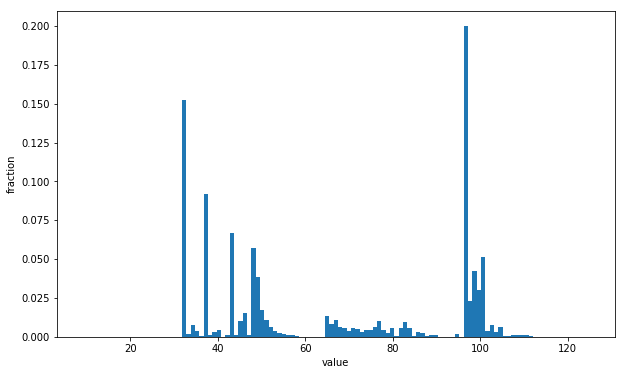

In [7]:
def create_feature_min_byte_value(payloads):
    '''
    Feature
    Minimum byte value in payload
    '''
    
    payloads['min-byte'] = [ min(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_min_byte_value(payloads)

plot_feature_distribution(payloads['min-byte'])

Properties of feature: max-byte
count    140725.000000
mean        109.900643
std          19.384149
min          33.000000
25%         114.000000
50%         116.000000
75%         119.000000
max         240.000000
Name: max-byte, dtype: float64


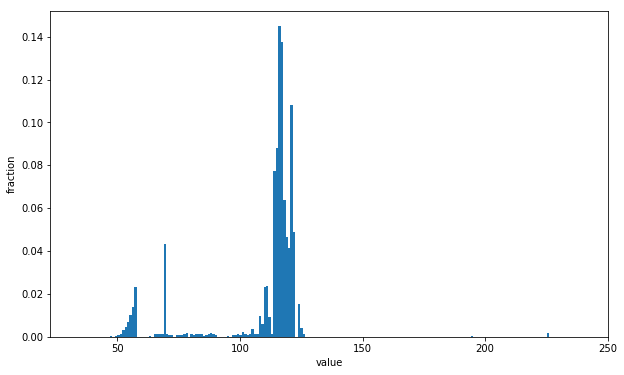

In [8]:
def create_feature_max_byte_value(payloads):
    '''
    Feature
    Maximum byte value in payload
    '''
    
    payloads['max-byte'] = [ max(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_max_byte_value(payloads)

plot_feature_distribution(payloads['max-byte'])


In [9]:
def create_feature_mean_byte_value(payloads):
    '''
    Feature
    Maximum byte value in payload
    '''
    
    payloads['mean-byte'] = [ np.mean(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads




Properties of feature: std-byte
count    140725.000000
mean         13.891213
std          10.024007
min           0.000000
25%           6.000000
50%           9.000000
75%          24.000000
max          75.000000
Name: std-byte, dtype: float64


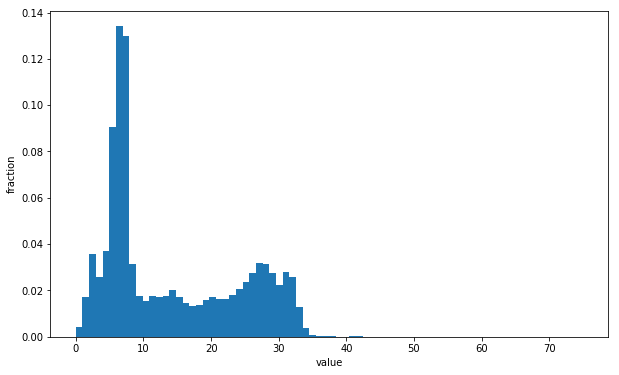

In [10]:
def create_feature_std_byte_value(payloads):
    '''
    Feature
    Standard deviation byte value in payload
    '''
    
    payloads['std-byte'] = [ np.std(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads
create_feature_std_byte_value(payloads)

plot_feature_distribution(payloads['std-byte'].astype(int))

Properties of feature: distinct-bytes
count    140725.000000
mean         10.651981
std           8.527121
min           1.000000
25%           6.000000
50%           7.000000
75%          12.000000
max          76.000000
Name: distinct-bytes, dtype: float64


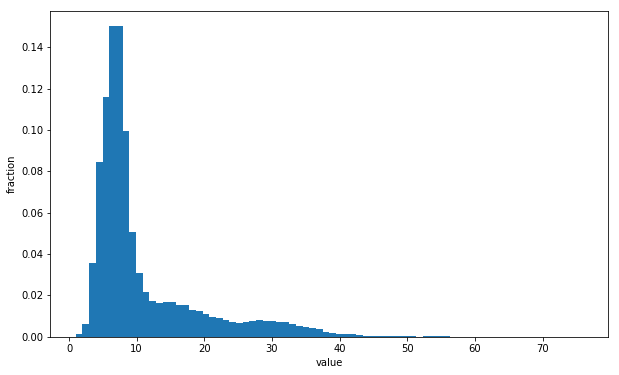

In [11]:
def create_feature_distinct_bytes(payloads):
    '''
    Feature
    Number of distinct bytes in payload
    '''
    
    payloads['distinct-bytes'] = [ len(list(set(bytearray(str(row), 'utf8')))) for row in payloads['payload']]
    return payloads
create_feature_distinct_bytes(payloads)

plot_feature_distribution(payloads['distinct-bytes'])

pandas.core.frame.DataFrame

Properties of feature: sql-keywords
count    140725.000000
mean          0.425049
std           1.193915
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: sql-keywords, dtype: float64


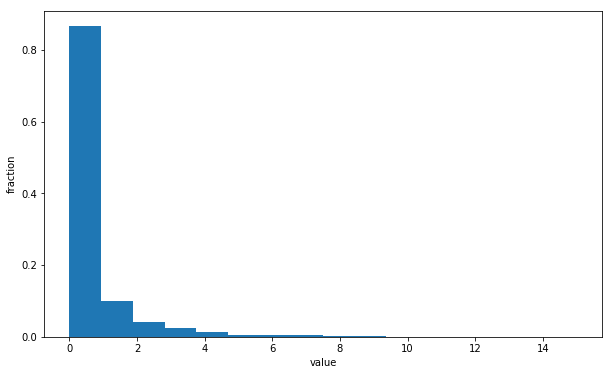

In [12]:
sql_keywords = pd.read_csv('SQLKeywords.txt', index_col=False)

def create_feature_sql_keywords(payloads):
    
    '''
    Feature
    Number of SQL keywords within payload
    '''
    payloads['sql-keywords'] = [ len([1 for keyword in sql_keywords['Keyword'] if str(keyword).lower() in str(row).lower()]) for row in payloads['payload']]
    return payloads
create_feature_sql_keywords(payloads)
display(type(sql_keywords))
plot_feature_distribution(payloads['sql-keywords'])

Properties of feature: js-keywords
count    140725.000000
mean          0.441904
std           0.926832
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          15.000000
Name: js-keywords, dtype: float64


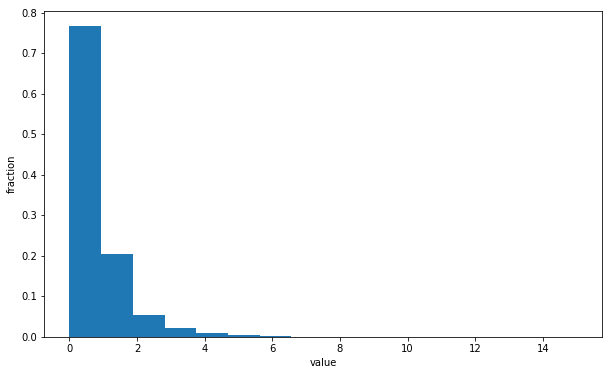

In [13]:
js_keywords = pd.read_csv('JavascriptKeywords.txt', index_col=False)

def create_feature_javascript_keywords(payloads):
    '''
    Feature
    Number of Javascript keywords within payload
    '''
    
    payloads['js-keywords'] = [len([1 for keyword in js_keywords['Keyword'] if str(keyword).lower() in str(row).lower()]) for row in payloads['payload']]
    return payloads
create_feature_javascript_keywords(payloads)
plot_feature_distribution(payloads['js-keywords'])

In [14]:
def create_features(payloads):
    features = create_feature_length(payloads)
    features = create_feature_non_printable_characters(features)
    features = create_feature_punctuation_characters(features)
    features = create_feature_max_byte_value(features)
    features = create_feature_min_byte_value(features)
    features = create_feature_mean_byte_value(features)
    features = create_feature_std_byte_value(features)
    features = create_feature_distinct_bytes(features)
    features = create_feature_sql_keywords(features)
    features = create_feature_javascript_keywords(features)
    del features['payload']

    return features

[4000899.11010204   12517.5281981  1721790.76690386   23286.66512931
  415024.64424662   45842.70933821  389147.24191546  572166.96702727
  235795.54736609   87738.69507777]
[4000899.11   12517.53 1721790.77   23286.67  415024.64   45842.71
  389147.24  572166.97  235795.55   87738.7 ]


['non-printable',
 'max-byte',
 'mean-byte',
 'js-keywords',
 'sql-keywords',
 'std-byte',
 'min-byte',
 'distinct-bytes',
 'punctuation',
 'length']

['max-byte 12517.528198101856',
 'js-keywords 23286.665129305315',
 'std-byte 45842.70933820903',
 'length 87738.69507776672',
 'punctuation 235795.54736608657',
 'min-byte 389147.24191546394',
 'sql-keywords 415024.6442466236',
 'distinct-bytes 572166.9670272716',
 'mean-byte 1721790.7669038614',
 'non-printable 4000899.110102039']

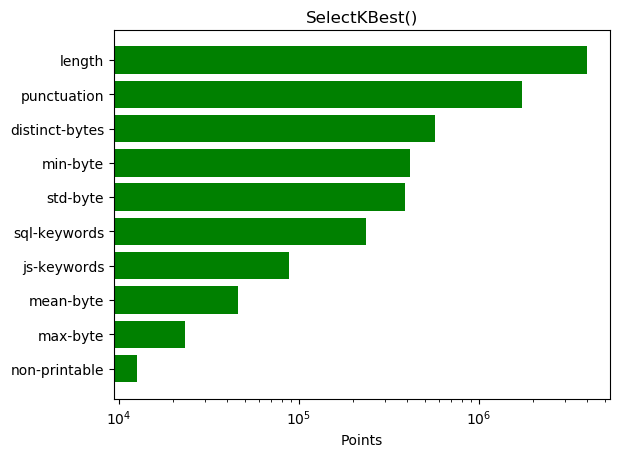

In [15]:
Y = payloads['injection_type']
X = create_features(pd.DataFrame(payloads['payload'].copy()))

test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, Y)
# summarize scores
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
# summarize scores
np.set_printoptions(precision=2)
print(fit.scores_)

# Get the indices sorted by most important to least important
indices = np.argsort(fit.scores_)

# To get your top 10 feature names
featuress = []
for i in range(10):
    featuress.append(X.columns[indices[i]])

display(featuress)
display([featuress[i] + ' ' + str(fit.scores_[i]) for i in indices[range(10)]])


plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(featuress))
performance = 3 + 10 * np.random.rand(len(featuress))
error = np.random.rand(len(featuress))


ax.barh(y_pos, fit.scores_[indices[range(10)]],  align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(featuress)
ax.set_xscale('log')

#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Points')
ax.set_title('SelectKBest()')

plt.show()


In [22]:
def sensitivity(label, confusion_matrix):
     # i means which class to choose to do one-vs-the-rest calculation
        # rows are actual obs whereas columns are predictions
    TP = confusion_matrix[label,label]  # correctly labeled as i
    FP = confusion_matrix[:,label].sum() - TP  # incorrectly labeled as i
    FN = confusion_matrix[label,:].sum() - TP  # incorrectly labeled as non-i
    TN = confusion_matrix.sum().sum() - TP - FP - FN # correctly labeled as non-i
    return TP / float(TP + FN)
    
def specificity(label, confusion_matrix):
    # i means which class to choose to do one-vs-the-rest calculation
        # rows are actual obs whereas columns are predictions
    TP = confusion_matrix[label,label]  # correctly labeled as i
    FP = confusion_matrix[:,label].sum() - TP  # incorrectly labeled as i
    FN = confusion_matrix[label,:].sum() - TP  # incorrectly labeled as non-i
    TN = confusion_matrix.sum().sum() - TP - FP - FN # correctly labeled as non-i
    return  TN / float(TN + FP)


def true_Positive(label, confusion_matrix):
    # i means which class to choose to do one-vs-the-rest calculation
        # rows are actual obs whereas columns are predictions
    TP = confusion_matrix[label,label]  # correctly labeled as i
       
    return  TP

def sensitivity_avg(confusion_matrix): 
    sum_of_sensitivity = 0
    for label in range(3):
        sum_of_sensitivity =sum_of_sensitivity + sensitivity(label, confusion_matrix)
    return sum_of_sensitivity / 3

def specificity_avg(confusion_matrix):
    sum_of_specificity = 0
    for label in range(3):
        sum_of_specificity = sum_of_specificity + specificity(label, confusion_matrix)
    return sum_of_specificity / 3

def accuracy_avg(confusion_matrix):
    sum_of_accuracy = 0
    for label in range(3):
        sum_of_accuracy = sum_of_accuracy + true_Positive(label, confusion_matrix)
    return sum_of_accuracy / (confusion_matrix.sum().sum()) 



In [18]:
def train_model(clf, param_grid, X, Y):
    '''Trains and evaluates the model clf from input
    
    The function selects the best model of clf by optimizing for the validation data,
    then evaluates its performance using the out of sample test data.
    
    input - clf: the model to train
            param_grid: a dict of hyperparameters to use for optimization
            X: features
            Y: labels
    
    output - the best estimator (trained model)
             the confusion matrix from classifying the test data
    '''
    #First, partition into train and test data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    n_splits = 5
    #If number of possible iterations are less than prefered number of iterations, 
    #set it to the number of possible iterations
    #number of possible iterations are not less than prefered number of iterations if any argument is expon()
    #because expon() is continous (writing 100 instead, could be any large number)
    n_splits = min(n_splits,np.prod([
        100 if type(xs) == type(expon()) 
        else len(xs) 
        for xs in param_grid.values()
    ]))
    
    #perform a grid search for the best parameters on the training data.
    #Cross validation is made to select the parameters, so the training data is actually split into
    #a new train data set and a validation data set, K number of times
    cv = ShuffleSplit( n_splits=5, test_size=0.2, random_state=0) #DEBUG: n_iter=10
    #cv = KFold(n_splits=10, random_state=42, shuffle=False)
    random_grid_search = RandomizedSearchCV(
        clf, 
        param_distributions=param_grid,
        cv=cv, 
        
        n_iter=n_splits, #DEBUG 1 
        random_state=5,
        refit=True,
        verbose=10
        
    )
    
    random_grid_search.fit(X_train, Y_train)
    #Evaluate the best model on the test data
    Y_test_predicted = random_grid_search.best_estimator_.predict(X_test)
    Y_test_predicted_prob = random_grid_search.best_estimator_.predict_proba(X_test)[:, 1]

    confusion = confusion_matrix(Y_test, Y_test_predicted)
    sensitivity = sensitivity_avg(confusion)
    specificity = specificity_avg(confusion)
    accuracy =  accuracy_avg(confusion)
    F1score =  F1_score(confusion)

    return {
        'conf_matrix':confusion, 
        'accuracy':accuracy, 
        'sensitivity':sensitivity,
        'specificity':specificity,
        'F1-score':F1score,
        'params':random_grid_search.best_params_,
        'model':random_grid_search.best_estimator_
    }

In [18]:
def create_classifier_inputs(subscript):
    
    classifier_inputs = {}
    
    
   
    classifier_inputs[subscript + ' AdaBoostClassifier'] = {
        'pipeline':AdaBoostClassifier(n_estimators=100),
        'dict_params': {
            'n_estimators':[10,20,50, 100], 
            'learning_rate':[0.1, 0.5, 1.0, 2.0]
        }
    }
    
    classifier_inputs[subscript + ' SGD'] = {
        'pipeline':SGDClassifier(loss="log", penalty="l2"),
        'dict_params': {
            'learning_rate': ['optimal']
        }
    }
    classifier_inputs[subscript + ' RandomForest'] = {
        'pipeline':RandomForestClassifier(
            max_depth=None,min_samples_split=2, random_state=0),
        'dict_params': {
            'n_estimators':[10,20,40,60]
        }
    }
    classifier_inputs[subscript + ' DecisionTree'] = {
        'pipeline':  DecisionTreeClassifier(max_depth=5),
        'dict_params': {
            'min_samples_split': [2]
        }
    }
    classifier_inputs[subscript + ' MLPClassifier'] = {
        'pipeline':MLPClassifier(
            activation='relu',
            solver='adam',
            early_stopping=False,
            verbose=True
            
        ),
        'dict_params': {
            'hidden_layer_sizes':[(300, 200, 150, 150), (30, 30, 30), (150, 30, 30, 150), 
                                  (400, 250, 100, 100) , (150, 200, 300)],
            'alpha':[0.0005,0.001,0.01,0.1,1],
            'learning_rate':['constant','invscaling'],
            'learning_rate_init':[0.0005,0.001,0.01,0.1,1],
             'momentum':[0,0.9],
        }
    }
    classifier_inputs[subscript + ' Logistic'] = {
        'pipeline':LogisticRegression(),
        'dict_params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    }
    classifier_inputs[subscript + ' MultinomialNB'] = {
        'pipeline':MultinomialNB(),
        'dict_params': {
            'alpha': [1.0]
        }
    }
    
    classifier_inputs[subscript + ' SVM'] = {
        'pipeline':SVC(probability=True),
        'dict_params': {
            'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'gamma':[0.001, 0.0001,'auto'],
            'kernel':['rbf']
        }
    }
    return classifier_inputs

In [20]:
classifier_results = pd.DataFrame(columns=['F1-score','accuracy','sensitivity','specificity','conf_matrix','params','model'])#,index=classifier_inputs.keys())

In [24]:
classifier_inputs_custom = {}

#Get classifiers and parameters to optimize
classifier_inputs_custom.update(create_classifier_inputs('custom'))

#Extract payloads and labels
Y = payloads['injection_type']
X = create_features(pd.DataFrame(payloads['payload'].copy()))

#Select the best features
X_new = SelectKBest(score_func=chi2, k=4).fit_transform(X,Y)

#Call train_model for every classifier and save results to classifier_results
for classifier_name, inputs in classifier_inputs_custom.items():
    if classifier_name in classifier_results.index.values.tolist():
        print('Skipping ' + classifier_name + ', already trained')
    else:
        result_dict = train_model(inputs['pipeline'],inputs['dict_params'],X,Y)
        classifier_results.loc[classifier_name] = result_dict

display(classifier_results)

#pickle.dump( classifier_results, open( "trained_custom_all_features_multiclass.p", "wb" ) )

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] min_samples_split=2 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... min_samples_split=2, score=0.9744181915082608, total=   0.4s
[CV] min_samples_split=2 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .... min_samples_split=2, score=0.9719754841001954, total=   0.5s
[CV] min_samples_split=2 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] .... min_samples_split=2, score=0.9749067329898738, total=   0.5s
[CV] min_samples_split=2 .............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV] .... min_samples_split=2, score=0.9754841001954166, total=   0.5s
[CV] min_samples_split=2 .............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s


[CV] .... min_samples_split=2, score=0.9712204654467934, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


,F1-score,accuracy,sensitivity,specificity,conf_matrix,params,model
custom RandomForest,0.995594,0.995594,0.983204,0.994836,"[[23967, 12, 16], [19, 2434, 23], [34, 20, 1620]]",{'n_estimators': 40},"(DecisionTreeClassifier(class_weight=None, cri..."
custom DecisionTree,0.975129,0.975129,0.894007,0.969167,"[[23915, 67, 13], [113, 2188, 175], [211, 121,...",{'min_samples_split': 2},"DecisionTreeClassifier(class_weight=None, crit..."


In [ ]:
def get1Grams(payload_obj):
    '''Divides a string into 1-grams
    
    Example: input - payload: "<script>"
             output- ["<","s","c","r","i","p","t",">"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-1):
        ngrams.append(payload[i:i+1])
    return ngrams

tfidf_vectorizer_1grams = TfidfVectorizer(tokenizer=get1Grams)
count_vectorizer_1grams = CountVectorizer(min_df=1, tokenizer=get1Grams)

In [4]:
def get2Grams(payload_obj):
    '''Divides a string into 2-grams
    
    Example: input - payload: "<script>"
             output- ["<s","sc","cr","ri","ip","pt","t>"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-2):
        ngrams.append(payload[i:i+2])
    return ngrams

tfidf_vectorizer_2grams = TfidfVectorizer(tokenizer=get2Grams)
count_vectorizer_2grams = CountVectorizer(min_df=1, tokenizer=get2Grams)

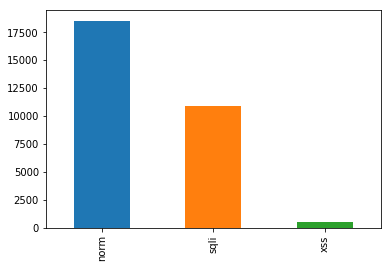

In [3]:
payloads['attack_type'].value_counts().plot(kind='bar');

In [5]:
def get3Grams(payload_obj):
    '''Divides a string into 3-grams
    
    Example: input - payload: "<script>"
             output- ["<sc","scr","cri","rip","ipt","pt>"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-3):
        ngrams.append(payload[i:i+3])
    return ngrams

tfidf_vectorizer_3grams = TfidfVectorizer(tokenizer=get3Grams)
count_vectorizer_3grams = CountVectorizer(min_df=1, tokenizer=get3Grams)

In [ ]:
def create_classifier_inputs_using_vectorizers(vectorizer, subscript):
    '''make pipelines of the specified vectorizer with the classifiers to train
    
    input - vectorizer: the vectorizer to add to the pipelines
            subscript:  subscript name for the dictionary key
            
    output - A dict of inputs to use for train_model(); a pipeline and a dict of params to optimize
    '''
    
    
classifier_inputs[subscript + ' RandomForest'] = {
        'pipeline':Pipeline([('vect', vectorizer),('clf',RandomForestClassifier(
            max_depth=None,min_samples_split=2, random_state=0))]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40],
            'clf__n_estimators':[10,20,40,60]
        }
    }
    classifier_inputs[subscript + ' Logistic'] = {
        'pipeline':Pipeline([('vect', vectorizer), ('clf',LogisticRegression())]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40],
            'clf__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    }
    classifier_inputs[subscript + ' SVM'] = {
        'pipeline':Pipeline([('vect', vectorizer), ('clf',SVC(probability=True))]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40],
            'clf__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'clf__gamma':[0.001, 0.0001,'auto'],
            'clf__kernel':['rbf']
        }
    }
    
    
    return classifier_inputs

In [ ]:
classifier_inputs = {}
classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_1grams,'count 1grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_2grams,'count 2grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_3grams,'count 3grams'))
X = payloads['payload'] 
Y = payloads['injection_type']

for classifier_name, inputs in classifier_inputs.items():
    display(inputs['dict_params'])
    if classifier_name in classifier_results.index.values.tolist():
        print('Skipping ' + classifier_name + ', already trained')
    else:
        result_dict = train_model(inputs['pipeline'],inputs['dict_params'],X,Y)
        classifier_results.loc[classifier_name] = result_dict

display(classifier_results)

pickle.dump( classifier_results, open( "trained_classifier.p", "wb" ) )

In [27]:
pickle.dump( classifier_results, open( "trained_all_multiclass_classifiers.p", "wb" ) )
display(classifier_results)
#classifier_results.info()

,F1-score,accuracy,sensitivity,specificity,conf_matrix,params,model
count 1grams RandomForest,0.9952,0.9986,0.9955,0.9982,"[[23986, 7, 2], [15, 2455, 6], [5, 3, 1666]]","{'vect__min_df': 5, 'clf__n_estimators': 60}","Pipeline(memory=None,\n steps=[('vect', Co..."
count 2grams RandomForest,0.9919,0.9984,0.9938,0.9974,"[[23987, 3, 5], [14, 2460, 2], [16, 4, 1654]]","{'vect__min_df': 5, 'clf__n_estimators': 60}","Pipeline(memory=None,\n steps=[('vect', Co..."
count 2grams Logistic,0.9904,0.9980,0.9913,0.9964,"[[23990, 3, 2], [21, 2453, 2], [21, 7, 1646]]","{'vect__min_df': 2, 'clf__C': 10}","Pipeline(memory=None,\n steps=[('vect', Co..."
count 2grams SVM,0.9895,0.9979,0.9912,0.9964,"[[23988, 3, 4], [20, 2454, 2], [23, 6, 1645]]","{'vect__min_df': 5, 'clf__kernel': 'rbf', 'clf...","Pipeline(memory=None,\n steps=[('vect', Co..."
count 3grams RandomForest,0.9894,0.9980,0.9903,0.9958,"[[23993, 2, 0], [20, 2456, 0], [32, 3, 1639]]","{'vect__min_df': 1, 'clf__n_estimators': 60}","Pipeline(memory=None,\n steps=[('vect', Co..."
count 1grams SVM,0.9889,0.9972,0.9898,0.9962,"[[23980, 12, 3], [29, 2437, 10], [13, 11, 1650]]","{'vect__min_df': 5, 'clf__kernel': 'rbf', 'clf...","Pipeline(memory=None,\n steps=[('vect', Co..."
count 3grams SVM,0.9888,0.9976,0.9895,0.9954,"[[23989, 4, 2], [26, 2449, 1], [30, 4, 1640]]","{'vect__min_df': 5, 'clf__kernel': 'rbf', 'clf...","Pipeline(memory=None,\n steps=[('vect', Co..."
count 3grams Logistic,0.9882,0.9977,0.9892,0.9952,"[[23991, 4, 0], [22, 2454, 0], [37, 2, 1635]]","{'vect__min_df': 2, 'clf__C': 10}","Pipeline(memory=None,\n steps=[('vect', Co..."
custom RandomForest,0.9773,0.9965,0.9855,0.9954,"[[23908, 3, 11], [18, 2482, 15], [33, 18, 1658]]",{'n_estimators': 60},"(DecisionTreeClassifier(class_weight=None, cri..."
count 1grams Logistic,0.9783,0.9951,0.9801,0.9927,"[[23979, 12, 4], [54, 2405, 17], [28, 23, 1623]]","{'vect__min_df': 20, 'clf__C': 10}","Pipeline(memory=None,\n steps=[('vect', Co..."


In [57]:
#Combine the two tables into one table
#classifier_results = pickle.load( open( "trained_custom_all_features_multiclass.p", "rb" ) )
classifier_results = pickle.load( open( "trained_all_multiclass_classifiers_each_class.p", "rb" ) )
#classifier_results = classifier_results.append(SVM3_classifier_results)
#classifier_results = classifier_results.sort_values(['sensitivity','accuracy'], ascending=[False,False])
display(classifier_results)

,Recall_XSS,Precision_XSS,Recall_SQLI,Precision_SQLI,Recall_LEGAL,Precision_LEGAL,F1-score,accuracy,sensitivity,specificity,conf_matrix,params,model
count 1grams RandomForest,0.991519,0.995943,0.991519,0.995943,0.999625,0.999167,0.996116,0.9986,0.9955,0.9982,"[[23986, 7, 2], [15, 2455, 6], [5, 3, 1666]]","{'vect__min_df': 5, 'clf__n_estimators': 60}","Pipeline(memory=None,\n steps=[('vect', Co..."
count 2grams RandomForest,0.993538,0.997163,0.993538,0.997163,0.999667,0.998751,0.995490,0.9984,0.9938,0.9974,"[[23987, 3, 5], [14, 2460, 2], [16, 4, 1654]]","{'vect__min_df': 5, 'clf__n_estimators': 60}","Pipeline(memory=None,\n steps=[('vect', Co..."
count 3grams RandomForest,0.991922,0.997968,0.991922,0.997968,0.999917,0.997837,0.994439,0.9980,0.9903,0.9958,"[[23993, 2, 0], [20, 2456, 0], [32, 3, 1639]]","{'vect__min_df': 1, 'clf__n_estimators': 60}","Pipeline(memory=None,\n steps=[('vect', Co..."
count 2grams Logistic,0.990711,0.995940,0.990711,0.995940,0.999792,0.998252,0.994248,0.9980,0.9913,0.9964,"[[23990, 3, 2], [21, 2453, 2], [21, 7, 1646]]","{'vect__min_df': 2, 'clf__C': 10}","Pipeline(memory=None,\n steps=[('vect', Co..."
count 2grams SVM,0.991115,0.996346,0.991115,0.996346,0.999708,0.998211,0.994062,0.9979,0.9912,0.9964,"[[23988, 3, 4], [20, 2454, 2], [23, 6, 1645]]","{'vect__min_df': 5, 'clf__kernel': 'rbf', 'clf...","Pipeline(memory=None,\n steps=[('vect', Co..."
count 3grams Logistic,0.991115,0.997561,0.991115,0.997561,0.999833,0.997547,0.993772,0.9977,0.9892,0.9952,"[[23991, 4, 0], [22, 2454, 0], [37, 2, 1635]]","{'vect__min_df': 2, 'clf__C': 10}","Pipeline(memory=None,\n steps=[('vect', Co..."
count 3grams SVM,0.989095,0.996744,0.989095,0.996744,0.999750,0.997671,0.993504,0.9976,0.9895,0.9954,"[[23989, 4, 2], [26, 2449, 1], [30, 4, 1640]]","{'vect__min_df': 5, 'clf__kernel': 'rbf', 'clf...","Pipeline(memory=None,\n steps=[('vect', Co..."
count 1grams SVM,0.984249,0.990650,0.984249,0.990650,0.999375,0.998252,0.991725,0.9972,0.9898,0.9962,"[[23980, 12, 3], [29, 2437, 10], [13, 11, 1650]]","{'vect__min_df': 5, 'clf__kernel': 'rbf', 'clf...","Pipeline(memory=None,\n steps=[('vect', Co..."
custom RandomForest,0.986879,0.991610,0.986879,0.991610,0.999415,0.997871,0.988407,0.9965,0.9855,0.9954,"[[23908, 3, 11], [18, 2482, 15], [33, 18, 1658]]",{'n_estimators': 60},"(DecisionTreeClassifier(class_weight=None, cri..."
count 1grams Logistic,0.971325,0.985656,0.971325,0.985656,0.999333,0.996592,0.984920,0.9951,0.9801,0.9927,"[[23979, 12, 4], [54, 2405, 17], [28, 23, 1623]]","{'vect__min_df': 20, 'clf__C': 10}","Pipeline(memory=None,\n steps=[('vect', Co..."


In [65]:
classifier_results = classifier_results.drop("conf_matrix", axis=1)
display(classifier_results)

,Recall_XSS,Precision_XSS,Recall_SQLI,Precision_SQLI,Recall_LEGAL,Precision_LEGAL,F1-score
count 1grams RandomForest,0.995221,0.995221,0.991519,0.995943,0.999625,0.999167,0.996116
count 2grams RandomForest,0.988053,0.995786,0.993538,0.997163,0.999667,0.998751,0.995490
count 3grams RandomForest,0.979092,1.000000,0.991922,0.997968,0.999917,0.997837,0.994439
count 2grams Logistic,0.983274,0.997576,0.990711,0.995940,0.999792,0.998252,0.994248
count 2grams SVM,0.982676,0.996366,0.991115,0.996346,0.999708,0.998211,0.994062
count 3grams Logistic,0.976703,1.000000,0.991115,0.997561,0.999833,0.997547,0.993772
count 3grams SVM,0.979689,0.998174,0.989095,0.996744,0.999750,0.997671,0.993504
count 1grams SVM,0.985663,0.992183,0.984249,0.990650,0.999375,0.998252,0.991725
custom RandomForest,0.970158,0.984561,0.986879,0.991610,0.999415,0.997871,0.988407
count 1grams Logistic,0.969534,0.987226,0.971325,0.985656,0.999333,0.996592,0.984920


In [7]:
def f1_score (confusion_matrix):
    
    sum_of_precisions = 0
    sum_of_recalls  = 0
    for label in range(3):
        TP = confusion_matrix[label,label]  # correctly labeled as i
        FP = confusion_matrix[:,label].sum() - TP   # incorrectly labeled as i
        FN = confusion_matrix[label,:].sum() - TP  # incorrectly labeled as non-i
        TN = confusion_matrix.sum().sum() - TP - FP - FN # correctly labeled as non-i
        precision= TP / (TP + FP)
        recall =   TP /( TP + FN)
        sum_of_precisions += precision
        sum_of_recalls +=    recall
       
    rows, columns = confusion_matrix.shape
    precision_averages = sum_of_precisions / rows
    recall_averages =  sum_of_recalls / columns
    return 2.0 * (precision_averages * recall_averages) / (precision_averages + recall_averages)


#Calculate F1-scores
classifier_results['F1-score'] = [ f1_score(conf_matrix) for conf_matrix in classifier_results['conf_matrix']]

#Re-arrange columns
classifier_results = classifier_results[['F1-score','accuracy','sensitivity','specificity','conf_matrix','params','model']]

#re-sort on F1-score
classifier_results = classifier_results.sort_values(['F1-score','accuracy'], ascending=[False,False])

display(classifier_results)

,F1-score,accuracy,sensitivity,specificity,conf_matrix,params,model
count 1grams RandomForest,0.996116,0.9986,0.9955,0.9982,"[[23986, 7, 2], [15, 2455, 6], [5, 3, 1666]]","{'vect__min_df': 5, 'clf__n_estimators': 60}","Pipeline(memory=None,\n steps=[('vect', Co..."
count 2grams RandomForest,0.995490,0.9984,0.9938,0.9974,"[[23987, 3, 5], [14, 2460, 2], [16, 4, 1654]]","{'vect__min_df': 5, 'clf__n_estimators': 60}","Pipeline(memory=None,\n steps=[('vect', Co..."
count 3grams RandomForest,0.994439,0.9980,0.9903,0.9958,"[[23993, 2, 0], [20, 2456, 0], [32, 3, 1639]]","{'vect__min_df': 1, 'clf__n_estimators': 60}","Pipeline(memory=None,\n steps=[('vect', Co..."
count 2grams Logistic,0.994248,0.9980,0.9913,0.9964,"[[23990, 3, 2], [21, 2453, 2], [21, 7, 1646]]","{'vect__min_df': 2, 'clf__C': 10}","Pipeline(memory=None,\n steps=[('vect', Co..."
count 2grams SVM,0.994062,0.9979,0.9912,0.9964,"[[23988, 3, 4], [20, 2454, 2], [23, 6, 1645]]","{'vect__min_df': 5, 'clf__kernel': 'rbf', 'clf...","Pipeline(memory=None,\n steps=[('vect', Co..."
count 3grams Logistic,0.993772,0.9977,0.9892,0.9952,"[[23991, 4, 0], [22, 2454, 0], [37, 2, 1635]]","{'vect__min_df': 2, 'clf__C': 10}","Pipeline(memory=None,\n steps=[('vect', Co..."
count 3grams SVM,0.993504,0.9976,0.9895,0.9954,"[[23989, 4, 2], [26, 2449, 1], [30, 4, 1640]]","{'vect__min_df': 5, 'clf__kernel': 'rbf', 'clf...","Pipeline(memory=None,\n steps=[('vect', Co..."
count 1grams SVM,0.991725,0.9972,0.9898,0.9962,"[[23980, 12, 3], [29, 2437, 10], [13, 11, 1650]]","{'vect__min_df': 5, 'clf__kernel': 'rbf', 'clf...","Pipeline(memory=None,\n steps=[('vect', Co..."
custom RandomForest,0.988407,0.9965,0.9855,0.9954,"[[23908, 3, 11], [18, 2482, 15], [33, 18, 1658]]",{'n_estimators': 60},"(DecisionTreeClassifier(class_weight=None, cri..."
count 1grams Logistic,0.984920,0.9951,0.9801,0.9927,"[[23979, 12, 4], [54, 2405, 17], [28, 23, 1623]]","{'vect__min_df': 20, 'clf__C': 10}","Pipeline(memory=None,\n steps=[('vect', Co..."


In [49]:
pickle.dump( classifier_results, open( "trained_all_multiclass_classifiers_each_class.p", "wb" ) )

In [44]:
classifier_results[['F1-score','accuracy','sensitivity','specificity']] = classifier_results[['F1-score','accuracy','sensitivity','specificity']].apply(pd.to_numeric)
classifier_results = classifier_results.round({'F1-score':4,'accuracy':4,'sensitivity':4,'specificity':4})
#classifier_results[['F1-score','accuracy','sensitivity','specificity','auc','conf_matrix','params']].to_csv('data/classifiers_result_table.csv')
display(classifier_results.dtypes)

F1-score       float64
accuracy       float64
sensitivity    float64
specificity    float64
conf_matrix     object
params          object
model           object
dtype: object

,custom,count 1grams,count 2grams,count 3grams
AdaBoostClassifier,0.9317,0,0,0
DecisionTree,0.9082,0,0,0
Logistic,0.9079,0.9849,0.9942,0.9938
MLPClassifier,0.9398,0,0,0
MultinomialNB,0.7378,0,0,0
RandomForest,0.9884,0.9961,0.9955,0.9944
SGD,0.8624,0,0,0
SVM,0.9808,0.9917,0.9941,0.9935


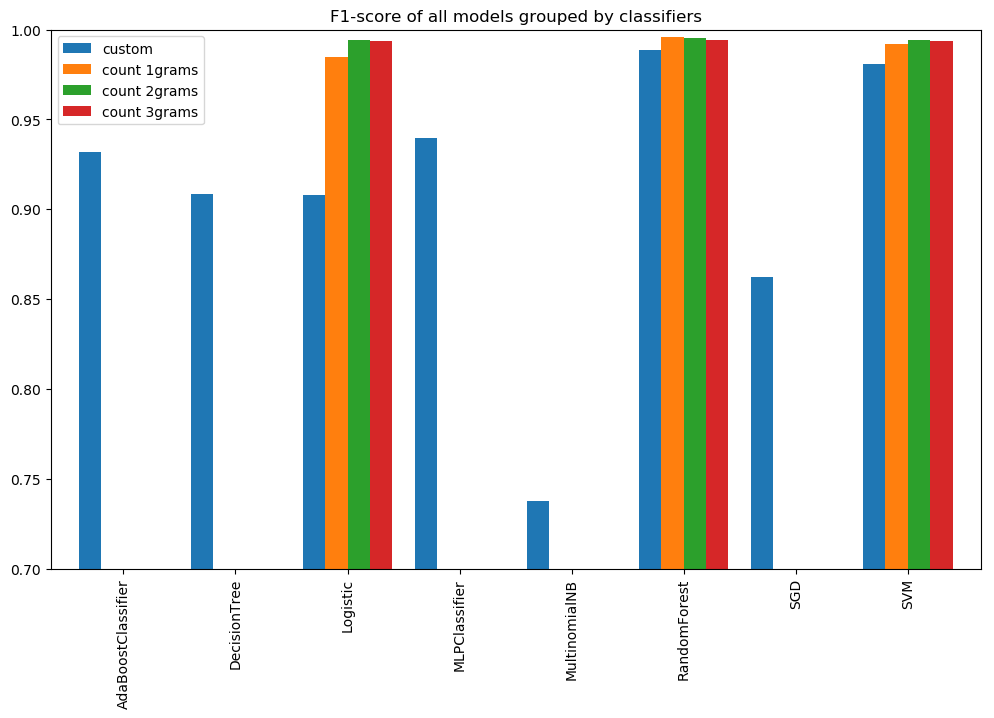

In [52]:
def get_classifier_name(index):
    '''
    Returns the name of the classifier at the given index name
    '''
    return index.split()[len(index.split())-1]
    
#Group rows together using same classifier
grouped = classifier_results.groupby(get_classifier_name)

hist_df = pd.DataFrame(columns=['custom','count 1grams','count 2grams','count 3grams'])

for classifier, indices in grouped.groups.items():
    
    #Make a list of feature spaces
    feature_spaces = indices.tolist()
    feature_spaces = [feature_space.replace(classifier,'') for feature_space in feature_spaces]
    feature_spaces = [feature_space.strip() for feature_space in feature_spaces]

    #If no result exists, it will stay as 0
    hist_df.loc[classifier] = {
            'custom':0,
            'count 1grams':0,
            'count 2grams':0,
            'count 3grams':0,
            
    }
    
    #Extract F1-score from classifier_results to corrensponding entry in hist_df
    for fs in feature_spaces:
        hist_df[fs].loc[classifier] = classifier_results['F1-score'].loc[fs + ' ' + classifier]
        

#Plot the bar plot
f, ax = plt.subplots()
ax.set_ylim([0.72,1])
hist_df.plot(kind='bar', figsize=(12,7), title='F1-score of all models grouped by classifiers', ax=ax, width=0.8)


#Make Avgerage F1-score row and cols for the table and print the table
hist_df_nonzero = hist_df.copy()
#hist_df_nonzero[hist_df > 0] = True
#hist_df['Avg Feature'] = (hist_df.sum(axis=1) / np.array(hist_df_nonzero.sum(axis=1)))
hist_df_nonzero = hist_df.copy()
#hist_df_nonzero[hist_df > 0] = True
#hist_df.loc['Avg Classifier'] = (hist_df.sum(axis=0) / np.array(hist_df_nonzero.sum(axis=0)))
hist_df = hist_df.round(4)
display(hist_df)

In [75]:
def plot_learning_curve(df_row,X,Y):
    '''Plots the learning curve of a classifier with its parameters
    
    input - df_row: row of classifier_result
            X: payload data
            Y: labels
    '''
    #The classifier to plot learning curve for
    estimator = df_row['model']
    
    title = 'Learning curves for classifier ' + df_row.name
    train_sizes = np.linspace(0.1,1.0,5)
    cv = ShuffleSplit( n_splits=5, test_size=0.2, random_state=0) #DEBUG: n_iter=10
    
    #plot settings
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    print('learning curve in process...')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, Y, cv=cv, n_jobs=-1, train_sizes=train_sizes, verbose=0) #Change verbose=10 to print progress
    print('Learning curve done!')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

learning curve in process...
Learning curve done!


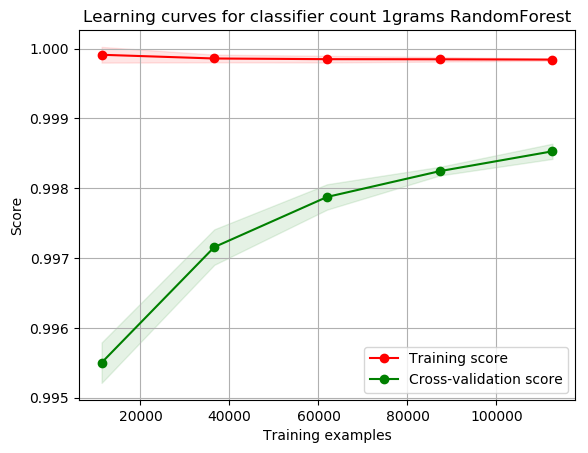

In [82]:
#plot learning curve for tfidf 1grams RandomForest
X = payloads['payload']
Y = payloads['injection_type']
plot_learning_curve(classifier_results.iloc[0],X,Y)

#plot learning curve for count 3grams MultinomialNB

#plot learning curve for custom svm
#X = create_features(pd.DataFrame(payloads['payload'].copy()))
#Y = payloads['injection_type']
#plot_learning_curve(classifier_results.iloc[1],X,Y)

In [6]:
def get1Grams(payload_obj):
    '''Divides a string into 1-grams
    
    Example: input - payload: "<script>"
             output- ["<","s","c","r","i","p","t",">"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-1):
        ngrams.append(payload[i:i+1])
    return ngrams

tfidf_vectorizer_1grams = TfidfVectorizer(tokenizer=get1Grams)
count_vectorizer_1grams = CountVectorizer(min_df=1, tokenizer=get1Grams)

loaded_model = pickle.load(open("RandomForest_count_1gram.p", 'rb'))


In [30]:

def clean(df1):
   # df = pd.DataFrame(payloads_updated,columns=["payload", "is_malicious", "injection_type"])
    df=[] 
    #df1 = conf2
    payload_next_line = False
    for line in df1.split('\n'):
            #Extract inputs from payload if first row in a GET packet
            if line.startswith('GET') and len(line.split('?')) > 1:
                
                #extract total payload string
                total_payload = (line.split('?')[1]).split(' ')[0]
                
                #add each input value separately to payloads
                inputs = total_payload.split('&')
                df = df + [input.split('=')[1] for input in inputs if len(input.split('=')) > 1]
                
            if line.startswith('Content-Length'):
                #notify that this is a HTTP POST packet and the next line will contain the payload
                payload_next_line = True
                
            elif payload_next_line and len(line) > 2:
                #Current line is a payload of a HTTP POST packet
                
                #add each input value separately to payloads
                inputs = line.split('&')
                df = df + [input.split('=')[1].strip('\n') for input in inputs if len(input.split('=')) > 1]
                
                payload_next_line = False
       
                df = list(set(df))
        
        
    return df


In [31]:
def predict(new_payload):
    prediction=[]
    pl=[]
    for payload in new_payload: 
            pl.append(payload)
            payload=[payload]
            #using default tokenizer 
            new_predict = loaded_model.predict(payload)
            new_predict =''.join(new_predict)
            prediction.append(new_predict)
            CRED = '\033[91m'
            CEND = '\033[0m'
            print("the request is :",CRED+ new_predict +CEND)
    
  
    return pl,prediction



In [32]:
def is_malicious (prediction):
    labels=[]
    for i in prediction:
        if i == "SQL" or i == "XSS":
            labels.append(1) 
       
        if i=="LEGAL":
            labels.append(0)   
       
    return labels 





In [33]:
def add_row(payloads_updated,payloads,labels,prediction):
    df = pd.DataFrame(payloads_updated,columns=["payload", "is_malicious", "injection_type"])
    df1 =pd.DataFrame({'payload': payloads,'is_malicious': labels,'injection_type': prediction })
   
    df3 = pd.concat([df, df1])
    final_df= df3.drop_duplicates()
    final_df.index = range(len(final_df.index))
    final_df.to_csv('cleaned_payloads.csv')
    
    


In [ ]:
print('Enter Request :')
conf2= input()
#conf2=[conf]
#print (conf2)
payloads_updated = payloads   
new_payload = clean(conf2)
CRED = '\033[93m'
CEND = '\033[0m'
print(CRED + 'The content of the new payload ' + CEND )
display(new_payload[:20])

payload,prediction=predict(new_payload)
#print('The new payload content ' + new_payload[:20] )
#display(payload[:20])
#display(prediction[:20])

labels= is_malicious(prediction)
#display(labels[:20])

add_row(payloads_updated,payload,labels,prediction)